In [13]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import utils
import dataset
import visualizations
from prediction_age import AgePredictor, AgeClassifier
from preprocessing import *

# external libs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt

# import shap

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [2]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [6]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1, random_state=dataset.GLOBAL_REPRODUCIBILITY_SEED)

In [215]:
len(data_france)

2097741

In [7]:
path_data_netherlands = os.path.join('..', 'data', 'netherlands-cities-200.csv')
data_netherlands = pd.read_csv(path_data_netherlands)
data_netherlands_sample = data_netherlands.sample(frac=.1, random_state=dataset.GLOBAL_REPRODUCIBILITY_SEED)

In [ ]:
xgb_params_optimal = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

## Preprocessing

## Experiments

In [182]:
data_netherlands_sample = data_netherlands.sample(frac=.1, random_state=dataset.GLOBAL_REPRODUCIBILITY_SEED)

2022-01-25 19:31:15,227 | INFO : Generated bins: [1900, 1950, 2000]
2022-01-25 19:31:15,228 | INFO : Generated bins with the following labels: ['1900-1949', '1950-1999']
2022-01-25 19:31:15,427 | INFO : Dataset length: 147536
2022-01-25 19:31:15,533 | INFO : Test dataset length: 29508
2022-01-25 19:31:15,534 | INFO : Training dataset length: 118028
2022-01-25 19:31:15,535 | INFO : Standard deviation of test set: 33.623222972418404
2022-01-25 19:31:15,536 | INFO : Mean age of test set: 1973.184661786634
2022-01-25 19:31:15,624 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 1999; other buildings have been removed).
2022-01-25 19:31:15,649 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 1999; other buildings have been removed).
2022-01-25 19:31:15,653 | INFO : Test dataset length after preprocessing: 23540
2022-01-25 19:31:15,654 | INFO : Training dataset length after preprocessing: 94276
2022-01-

              precision    recall  f1-score   support

           0       0.54      0.83      0.65      3944
           1       0.96      0.86      0.91     19596

    accuracy                           0.85     23540
   macro avg       0.75      0.84      0.78     23540
weighted avg       0.89      0.85      0.86     23540



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


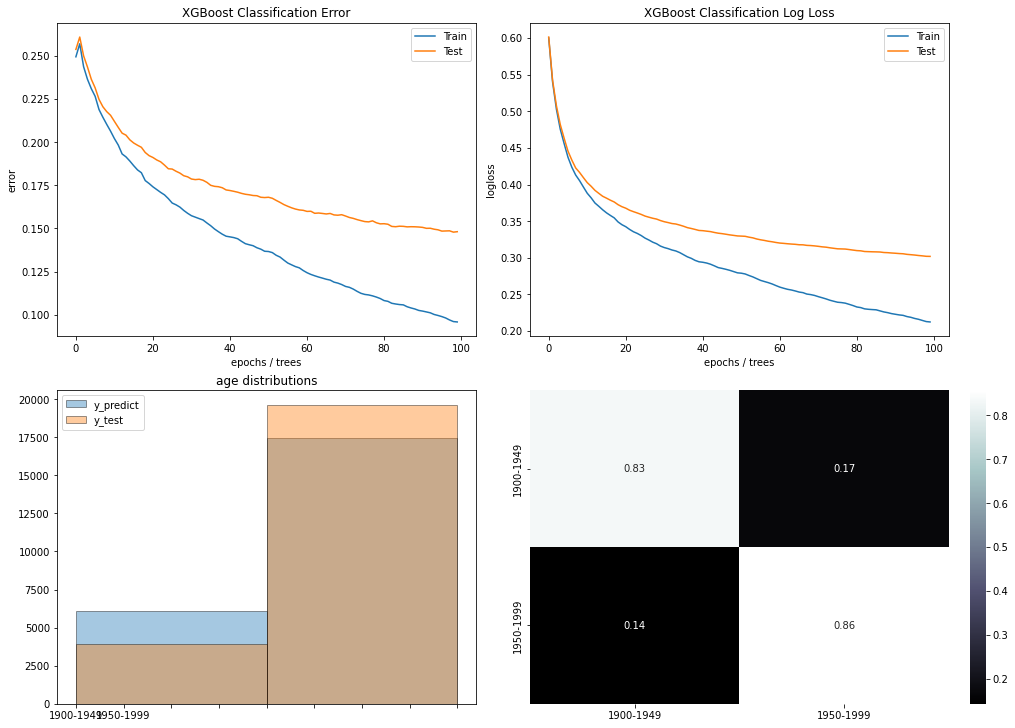

In [189]:
classifier_nl_native = AgeClassifier(
    model=XGBClassifier(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[],
    mitigate_class_imbalance=True,
    bin_config=(1900, 2020, 50),
)
classifier_nl_native.evaluate_classification()

2022-01-25 18:32:06,013 | INFO : Generated bins: [0, 1915, 1945, 1965, 1980, 2000, inf]
2022-01-25 18:32:06,013 | INFO : Generated bins with the following labels: ['<1915', '1915-1944', '1945-1964', '1965-1979', '1980-1999', '>=2000']
2022-01-25 18:32:06,441 | INFO : Dataset length: 147536
2022-01-25 18:32:06,618 | INFO : Test dataset length: 29508
2022-01-25 18:32:06,619 | INFO : Training dataset length: 118028
2022-01-25 18:32:06,620 | INFO : Standard deviation of test set: 33.623222972418404
2022-01-25 18:32:06,621 | INFO : Mean age of test set: 1973.184661786634
2022-01-25 18:32:06,735 | INFO : age attribute has been categorized (lowest age included: 0; highest age included: inf; other buildings have been removed).
2022-01-25 18:32:06,768 | INFO : age attribute has been categorized (lowest age included: 0; highest age included: inf; other buildings have been removed).
2022-01-25 18:32:06,773 | INFO : Test dataset length after preprocessing: 29508
2022-01-25 18:32:06,774 | INFO : Tr

              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1441
           1       0.48      0.56      0.52      2728
           2       0.61      0.64      0.62      3769
           3       0.77      0.74      0.76      7423
           4       0.79      0.75      0.77      8769
           5       0.67      0.67      0.67      5378

    accuracy                           0.69     29508
   macro avg       0.63      0.64      0.63     29508
weighted avg       0.69      0.69      0.69     29508



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


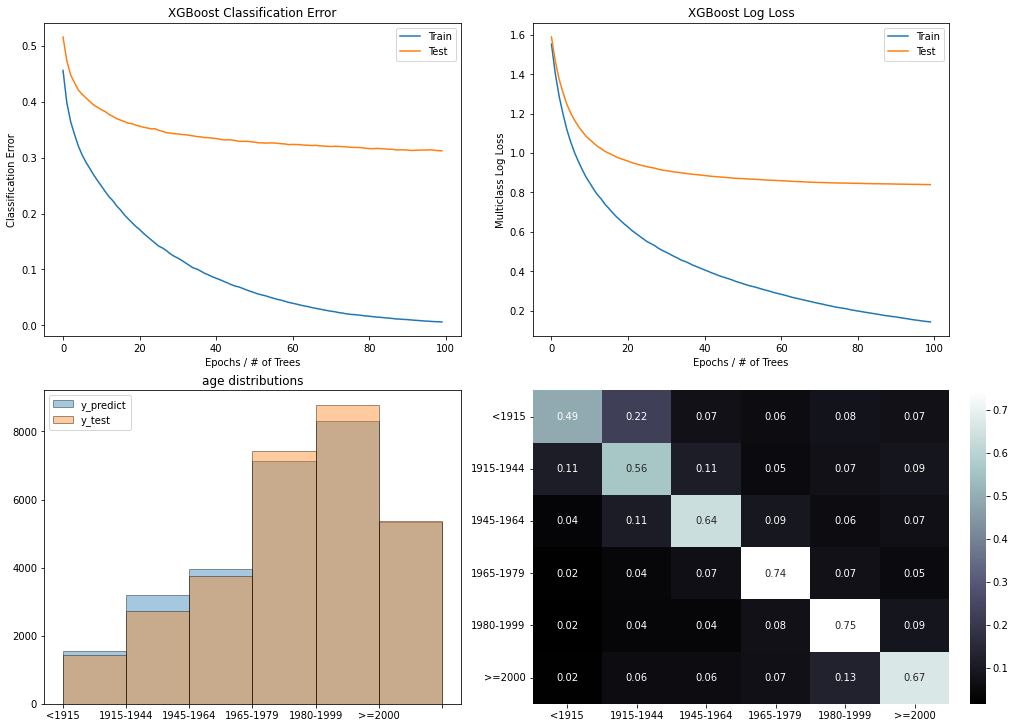

In [179]:
xgb_params_optimal = {
    'max_depth': 10,
    # 'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.5,
    'subsample': 0.7,
}
classifier_nl_native = AgeClassifier(
    model=XGBClassifier(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[],
    mitigate_class_imbalance=True,
    hyperparameters=xgb_params_optimal,
    bins=dataset.EHS_AGE_BINS,
)
classifier_nl_native.evaluate_classification()

2022-01-25 15:59:29,918 | INFO : Generated bins: [1900, 1920, 1940, 1960, 1980, 2000, 2020]
2022-01-25 15:59:29,918 | INFO : Generated bins with the following labels: ['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']
2022-01-25 15:59:30,048 | INFO : Dataset length: 147536
2022-01-25 15:59:30,157 | INFO : Test dataset length: 29508
2022-01-25 15:59:30,157 | INFO : Training dataset length: 118028
2022-01-25 15:59:30,159 | INFO : Standard deviation of test set: 33.623222972418404
2022-01-25 15:59:30,160 | INFO : Mean age of test set: 1973.184661786634
2022-01-25 15:59:30,259 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 2019; other buildings have been removed).
2022-01-25 15:59:30,284 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 2019; other buildings have been removed).
2022-01-25 15:59:30,287 | INFO : Test dataset length after preprocessing: 28918
2022-01-25 15:59

              precision    recall  f1-score   support

           0       0.39      0.38      0.38      1026
           1       0.46      0.56      0.50      2371
           2       0.59      0.57      0.58      2510
           3       0.76      0.76      0.76      8864
           4       0.78      0.75      0.76      8769
           5       0.68      0.67      0.67      5378

    accuracy                           0.69     28918
   macro avg       0.61      0.61      0.61     28918
weighted avg       0.70      0.69      0.70     28918



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


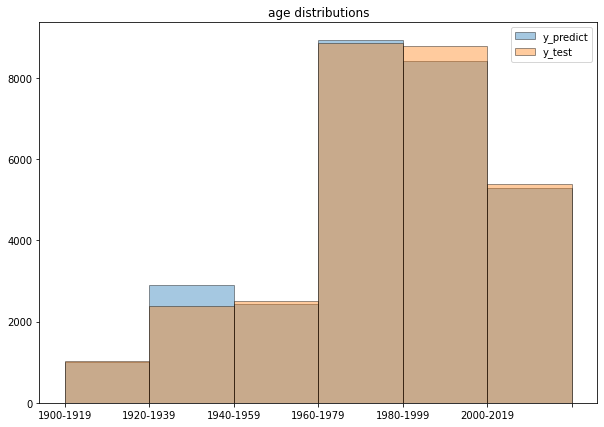

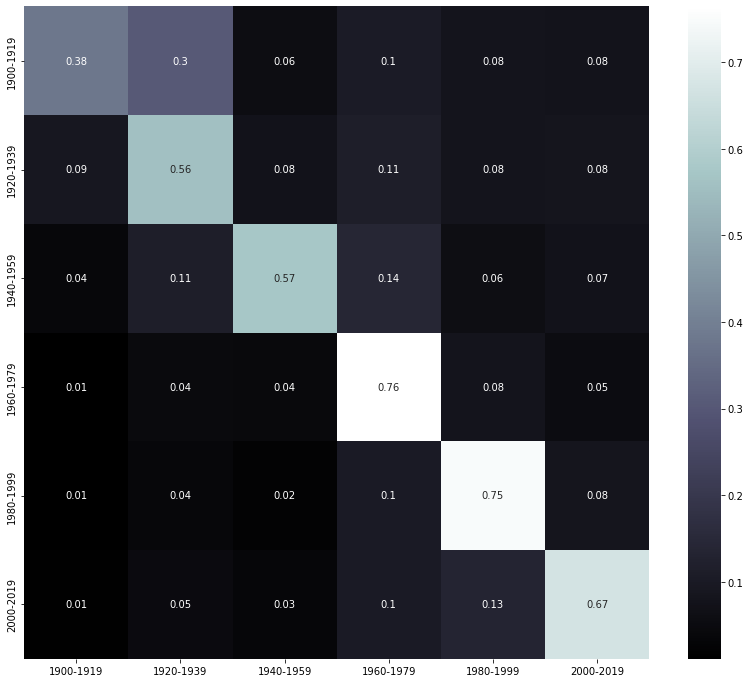

In [144]:
xgb_params_optimal = {
    'max_depth': 10,
    # 'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.5,
    'subsample': 0.7,
}
classifier_nl_native = AgeClassifier(
    model=XGBClassifier(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[],
    mitigate_class_imbalance=True,
    hyperparameters=xgb_params_optimal,
    bin_config=(1900, 2020, 20),
)
classifier_nl_native.evaluate_classification()

2022-01-25 15:48:03,866 | INFO : Generated bins: [1900, 1920, 1940, 1960, 1980, 2000, 2020]
2022-01-25 15:48:03,867 | INFO : Generated bins with the following labels: ['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']
2022-01-25 15:48:04,059 | INFO : Dataset length: 147536
2022-01-25 15:48:04,226 | INFO : Test dataset length: 29508
2022-01-25 15:48:04,227 | INFO : Training dataset length: 118028
2022-01-25 15:48:04,228 | INFO : Standard deviation of test set: 33.623222972418404
2022-01-25 15:48:04,230 | INFO : Mean age of test set: 1973.184661786634
2022-01-25 15:48:04,400 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 2019; other buildings have been removed).
2022-01-25 15:48:04,427 | INFO : age attribute has been categorized (lowest age included: 1900; highest age included: 2019; other buildings have been removed).
2022-01-25 15:48:04,431 | INFO : Test dataset length after preprocessing: 28918
2022-01-25 15:48

              precision    recall  f1-score   support

           0       0.24      0.54      0.33      1026
           1       0.39      0.59      0.47      2371
           2       0.45      0.60      0.51      2510
           3       0.81      0.65      0.72      8864
           4       0.81      0.65      0.72      8769
           5       0.62      0.64      0.63      5378

    accuracy                           0.64     28918
   macro avg       0.55      0.61      0.56     28918
weighted avg       0.69      0.64      0.65     28918



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


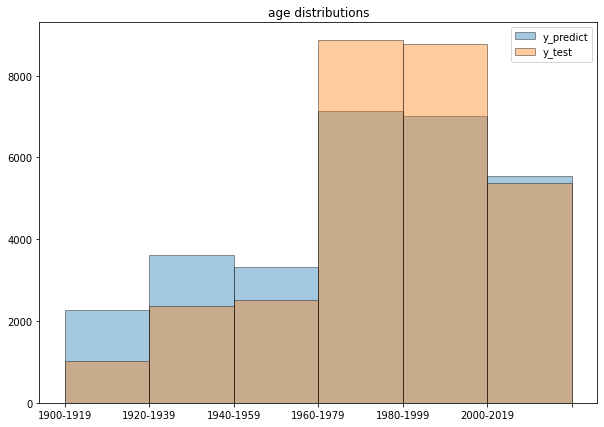

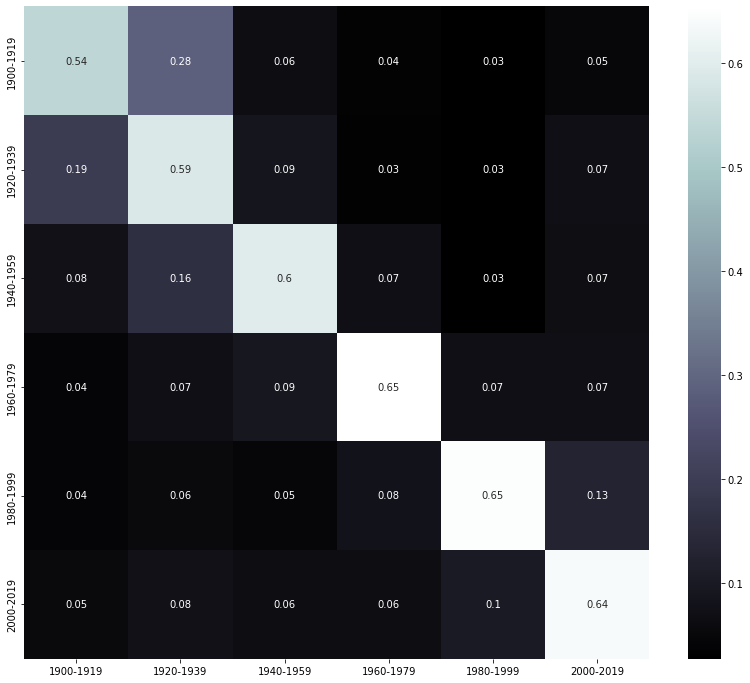

In [140]:
xgb_params_optimal = {
    # 'max_depth': 10,
    # 'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.5,
    'subsample': 0.7,
}
classifier_nl_native = AgeClassifier(
    model=XGBClassifier(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[],
    mitigate_class_imbalance=True,
    hyperparameters=xgb_params_optimal,
    bin_config=(1900, 2020, 20),
)
classifier_nl_native.evaluate_classification()

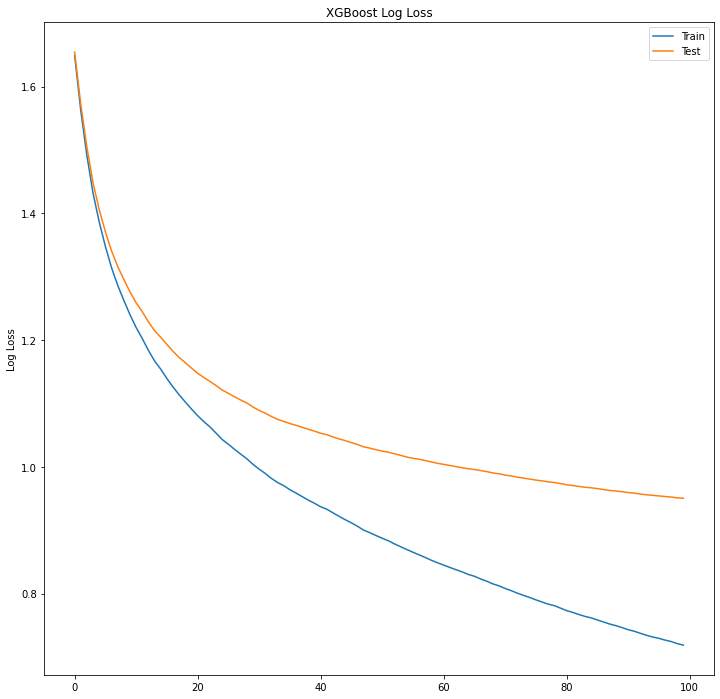

{'objective': 'multi:softprob',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 0.7,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': ['merror', 'mlogloss']}

In [141]:
visualizations.plot_log_loss(classifier_nl_native.model)
classifier_nl_native.model.get_params()

## Predict probability class distribution and sample from it

2022-01-26 11:15:36,124 | INFO : Generated bins: [0, 1915, 1945, 1965, 1980, 2000, inf]
2022-01-26 11:15:36,125 | INFO : Generated bins with the following labels: ['<1915', '1915-1944', '1945-1964', '1965-1979', '1980-1999', '>=2000']
2022-01-26 11:15:36,346 | INFO : Dataset length: 147536
2022-01-26 11:15:36,480 | INFO : Test dataset length: 29508
2022-01-26 11:15:36,481 | INFO : Training dataset length: 118028
2022-01-26 11:15:36,483 | INFO : Standard deviation of test set: 33.623222972418404
2022-01-26 11:15:36,484 | INFO : Mean age of test set: 1973.184661786634
2022-01-26 11:15:36,661 | INFO : age attribute has been categorized (lowest age included: 0; highest age included: inf; other buildings have been removed).
2022-01-26 11:15:36,695 | INFO : age attribute has been categorized (lowest age included: 0; highest age included: inf; other buildings have been removed).
2022-01-26 11:15:36,699 | INFO : Test dataset length after preprocessing: 29508
2022-01-26 11:15:36,700 | INFO : Tr

              precision    recall  f1-score   support

           0       0.37      0.41      0.39      1441
           1       0.43      0.46      0.44      2728
           2       0.51      0.55      0.53      3769
           3       0.68      0.66      0.67      7423
           4       0.71      0.68      0.70      8769
           5       0.60      0.60      0.60      5378

    accuracy                           0.61     29508
   macro avg       0.55      0.56      0.55     29508
weighted avg       0.62      0.61      0.61     29508



FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


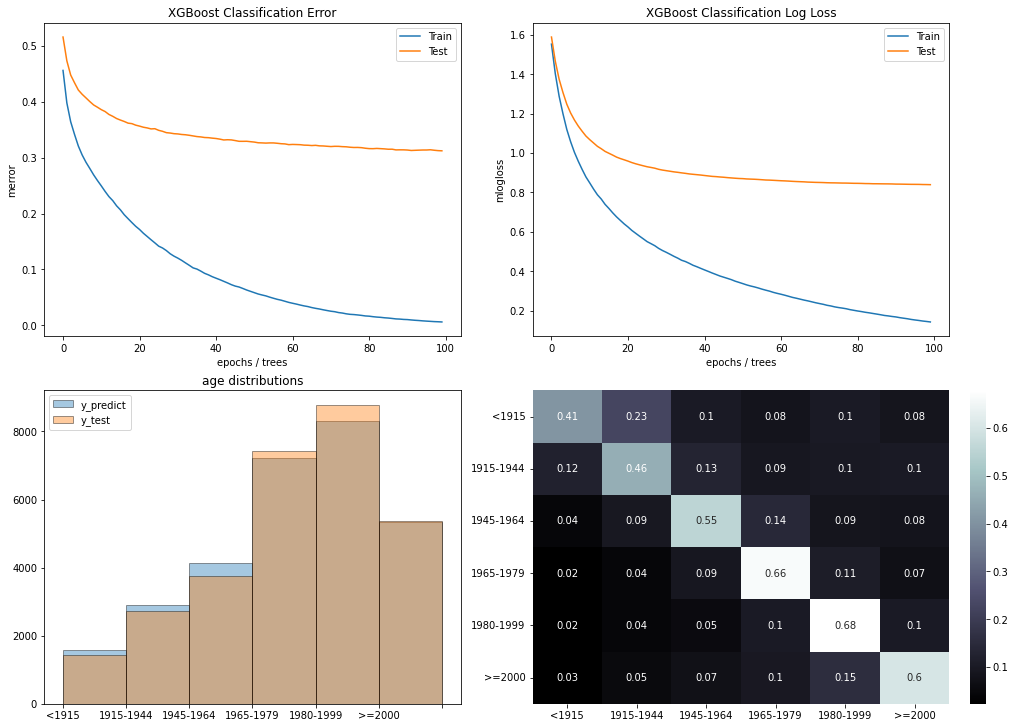

In [213]:
xgb_params_optimal = {
    'max_depth': 10,
    # 'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.5,
    'subsample': 0.7,
}
classifier_nl_native = AgeClassifier(
    model=XGBClassifier(),
    df=data_netherlands_sample,
    test_training_split=split_80_20,
    preprocessing_stages=[],
    mitigate_class_imbalance=True,
    predict_probabilities=True,
    hyperparameters=xgb_params_optimal,
    bins=dataset.EHS_AGE_BINS,
)
classifier_nl_native.evaluate_classification()

Result: Decrease in accuracy from .69 to .61

In [27]:
xgb_params_optimal = {
    'max_depth': 10,
    # 'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.5,
    'subsample': 0.7,
}
classifier_nl_native = AgeClassifier(
    model=XGBClassifier(),
    df=data_netherlands_sample.sample(frac=0.1),
    test_training_split=split_80_20,
    preprocessing_stages=[],
    mitigate_class_imbalance=True,
    predict_probabilities=True,
    hyperparameters=xgb_params_optimal,
    bins=dataset.EHS_AGE_BINS,
)
# classifier_nl_native.evaluate_classification()

2022-02-07 15:39:45,388 | INFO : Generated bins: [0, 1915, 1945, 1965, 1980, 2000, inf]
2022-02-07 15:39:45,389 | INFO : Generated bins with the following labels: ['<1915', '1915-1944', '1945-1964', '1965-1979', '1980-1999', '>=2000']
2022-02-07 15:39:45,409 | INFO : Dataset length: 14754
2022-02-07 15:39:45,419 | INFO : Test dataset length: 2951
2022-02-07 15:39:45,420 | INFO : Training dataset length: 11803
2022-02-07 15:39:45,421 | INFO : Standard deviation of test set: 32.341457001218984
2022-02-07 15:39:45,422 | INFO : Mean age of test set: 1972.8017621145375
2022-02-07 15:39:45,440 | INFO : age attribute has been categorized (lowest age included: 0; highest age included: inf; other buildings have been removed).
2022-02-07 15:39:45,447 | INFO : age attribute has been categorized (lowest age included: 0; highest age included: inf; other buildings have been removed).
2022-02-07 15:39:45,448 | INFO : Test dataset length after preprocessing: 2951
2022-02-07 15:39:45,449 | INFO : Train

In [ ]:

def prpr(prob, n_classes):
    pr = np.random.choice(list(range(0, n_classes)),1,p=prob)
    return pr

class_drawn = np.apply_along_axis(prpr, axis=1, arr=classifier_nl_native.class_probabilities, n_classes=len(classifier_nl_native.labels)).ravel()
classifier_nl_native.y_predict = pd.DataFrame({dataset.AGE_ATTRIBUTE: class_drawn})
classifier_nl_native.evaluate_classification()



NameError: name 'np' is not defined

## Bin edge experiments

In [65]:
a = [0, 1915, 1945, 1965, 1980, 2000, np.inf]
b = [0, 1915, 1960, np.inf]
labels = utils.generate_labels(a)
print(labels)




['<1915', '1915-1944', '1945-1964', '1965-1979', '1980-1999', '>=2000']


In [69]:
utils.age_bins(y=pd.DataFrame({'age':[0.5,3,4.5]}))

[0, 1, 2, 3, 4, 5]

In [62]:
test = pd.DataFrame({'days': [0,20,30,31,45,60]})
test['range2'] = pd.cut(test.days, [0,30,60], right=False)
test['cat'] = test['range2'].cat.codes
test


,days,range2,cat
0,0,"[0.0, 30.0)",0
1,20,"[0.0, 30.0)",0
2,30,"[30.0, 60.0)",1
3,31,"[30.0, 60.0)",1
4,45,"[30.0, 60.0)",1
5,60,NaN,-1


In [1]:
np.histogram(a, bins=10)


NameError: name 'np' is not defined

              precision    recall  f1-score   support

           0       0.29      0.30      0.30       148
           1       0.34      0.33      0.34       257
           2       0.42      0.44      0.43       378
           3       0.57      0.59      0.58       738
           4       0.62      0.61      0.62       899
           5       0.49      0.48      0.49       531

    accuracy                           0.52      2951
   macro avg       0.46      0.46      0.46      2951
weighted avg       0.52      0.52      0.52      2951

0.3887018505257185


FixedFormatter should only be used together with FixedLocator
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


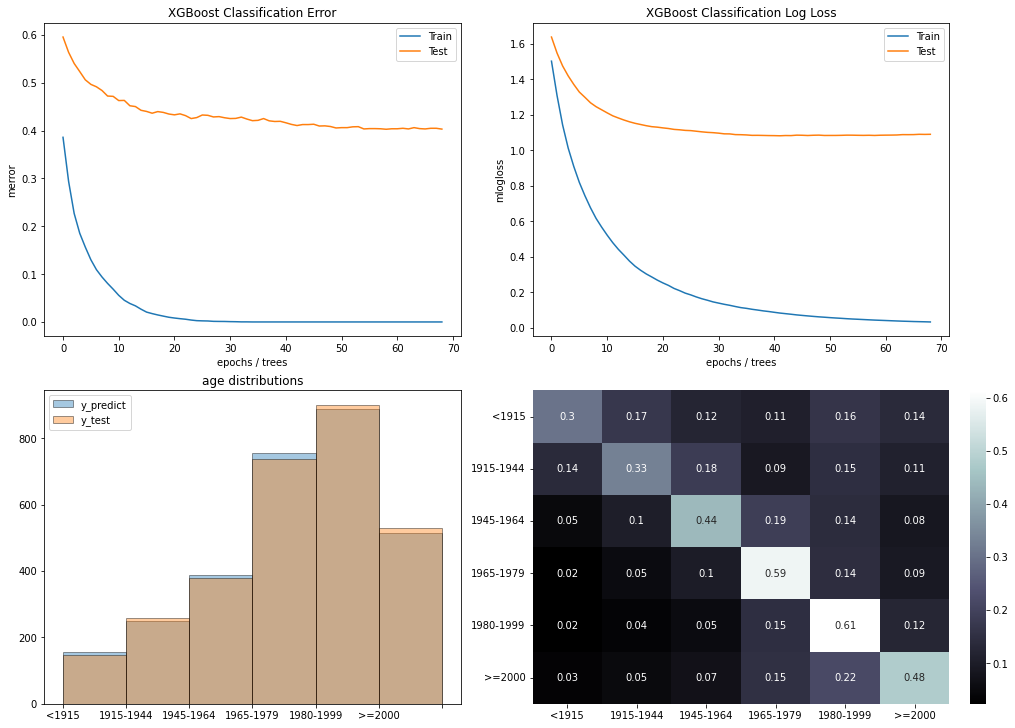

In [14]:
classifier_nl_native.evaluate_classification()

In [12]:
(classifier_nl_native.y_predict - classifier_nl_native.y_test).describe()

,age
count,2951.000000
mean,-0.019654
std,1.459378
min,-5.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000
